# Summary of the Trained Kernels

In [10]:
# To be changed to the path of the project root
%cd '/home/local/USHERBROOKE/aara2601/projects/quack-tsf/'

/home/local/USHERBROOKE/aara2601/projects/quack-tsf


## IQP kernel

In [2]:
from src.visualization.summary import Summary
from src.utils.settings import STORAGE_PATH
import os
import torch
import matplotlib.pyplot as plt

path_to_iqp_exp = os.path.join(STORAGE_PATH, 'experiments', 'iqp_kernel', '2024-03-20', '13-27-29')
iqp_summary = Summary(path_to_iqp_exp)

[INFO 04-16 18:35:03] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


### Used time series

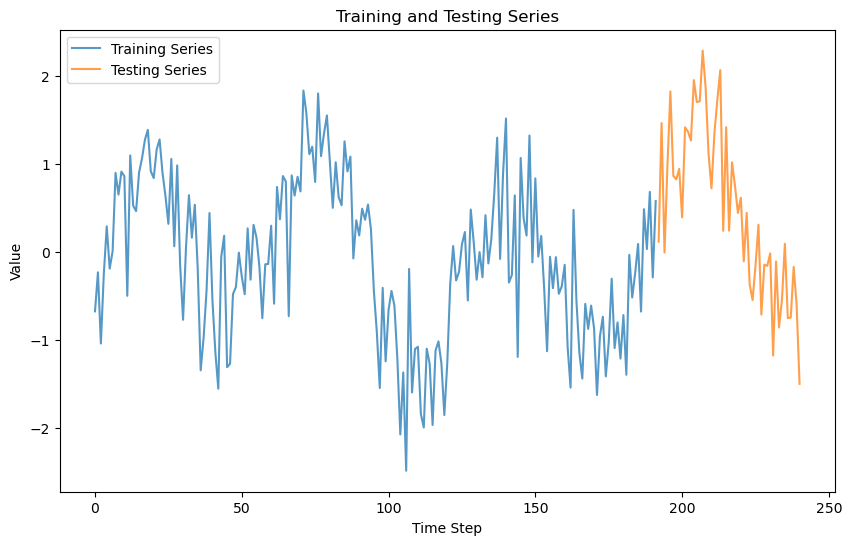

In [4]:
from src.utils.settings import PROJECT_ROOT_PATH

# The genereted series
figsize = (10, 6)
fig = iqp_summary.get_train_test_series(figsize=figsize)

# Save the figures
fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures')
fig_filename = os.path.join(fig_parent_path, 'train_test_series.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

### Model fitness

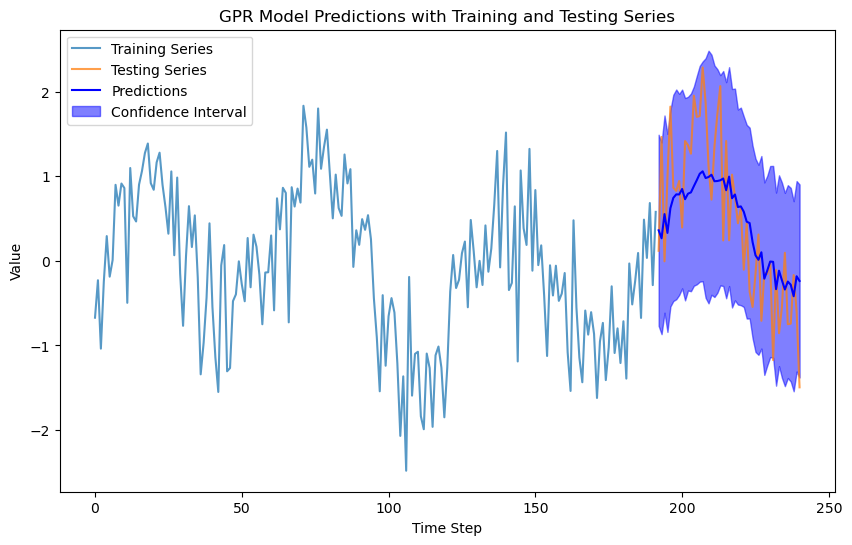

In [7]:
figsize = (10, 6)
fig = iqp_summary.generate_predictions_plot(figsize=figsize)

# Save the figures
fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/test_predictions')
fig_filename = os.path.join(fig_parent_path, 'test_predictions_IQP.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

In [9]:
iqp_metrics_df = iqp_summary.compute_metrics()
iqp_metrics_df

model_name    SMAPE      WAPE      MAPE      RMSE       MAE       MSE  \
0  iqp_kernel  0.67585  0.617786  0.946308  0.692123  0.568163  0.479034   

   LogLikelihood     MCRPS  
0     -50.575544  0.399198

### Bayesian Optimization Process

#### Trials summary

In [33]:
iqp_summary.bo_gp_model.ax_client.generation_strategy.trials_as_df

[INFO 03-14 14:55:42] ax.modelbridge.generation_strategy: Note that parameter values in dataframe are rounded to 2 decimal points; the values in the dataframe are thus not the exact ones suggested by Ax in trials.


Generation Step Generation Model  Trial Index Trial Status  \
0   GenerationStep_0            Sobol            0    COMPLETED   
1   GenerationStep_0            Sobol            1    COMPLETED   
2   GenerationStep_0            Sobol            2    COMPLETED   
3   GenerationStep_0            Sobol            3    COMPLETED   
4   GenerationStep_0            Sobol            4    COMPLETED   
5   GenerationStep_0            Sobol            5    COMPLETED   
6   GenerationStep_0            Sobol            6    COMPLETED   
7   GenerationStep_0            Sobol            7    COMPLETED   
8   GenerationStep_0            Sobol            8    COMPLETED   
9   GenerationStep_0            Sobol            9    COMPLETED   
10  GenerationStep_0            Sobol           10    COMPLETED   
11  GenerationStep_0            Sobol           11    COMPLETED   
12  GenerationStep_0            Sobol           12    COMPLETED   
13  GenerationStep_0            Sobol           13    COMPLETED   
14  GenerationStep_0            Sobol           14    COMPLETED   
15  GenerationStep_0            Sobol           15    COMPLETED   
16  GenerationStep_0            Sobol           16    COMPLETED   
17  GenerationStep_0            Sobol           17    COMPLETED   
18  GenerationStep_0            Sobol           18    COMPLETED   
19  GenerationStep_0            Sobol           19    COMPLETED   
20  GenerationStep_0            Sobol           20    COMPLETED   
21  GenerationStep_0            Sobol           21    COMPLETED   
22  GenerationStep_0            Sobol           22    COMPLETED   
23  GenerationStep_0            Sobol           23    COMPLETED   
24  GenerationStep_0            Sobol           24    COMPLETED   
25  GenerationStep_1             GPEI           25    COMPLETED   
26  GenerationStep_1             GPEI           26    COMPLETED   
27  GenerationStep_1             GPEI           27    COMPLETED   
28  GenerationStep_1             GPEI           28    COMPLETED   
29  GenerationStep_1             GPEI           29    COMPLETED   
30  GenerationStep_1             GPEI           30    COMPLETED   
31  GenerationStep_1             GPEI           31    COMPLETED   
32  GenerationStep_1             GPEI           32    COMPLETED   
33  GenerationStep_1             GPEI           33    COMPLETED   
34  GenerationStep_1             GPEI           34    COMPLETED   
35  GenerationStep_1             GPEI           35    COMPLETED   
36  GenerationStep_1             GPEI           36    COMPLETED   
37  GenerationStep_1             GPEI           37    COMPLETED   
38  GenerationStep_1             GPEI           38    COMPLETED   
39  GenerationStep_1             GPEI           39    COMPLETED   
40  GenerationStep_1             GPEI           40    COMPLETED   
41  GenerationStep_1             GPEI           41    COMPLETED   
42  GenerationStep_1             GPEI           42    COMPLETED   
43  GenerationStep_1             GPEI           43    COMPLETED   
44  GenerationStep_1             GPEI           44    COMPLETED   
45  GenerationStep_1             GPEI           45    COMPLETED   
46  GenerationStep_1             GPEI           46    COMPLETED   
47  GenerationStep_1             GPEI           47    COMPLETED   
48  GenerationStep_1             GPEI           48    COMPLETED   
49  GenerationStep_1             GPEI           49    COMPLETED   

                                Arm Parameterizations  
0   {'0_0': {'alpha': 0.03, 'noise_level': 0.87, '...  
1   {'1_0': {'alpha': 0.82, 'noise_level': 0.33, '...  
2   {'2_0': {'alpha': 0.74, 'noise_level': 0.71, '...  
3   {'3_0': {'alpha': 0.42, 'noise_level': 0.23, '...  
4   {'4_0': {'alpha': 0.34, 'noise_level': 0.55, '...  
5   {'5_0': {'alpha': 0.5, 'noise_level': 0.0, 'me...  
6   {'6_0': {'alpha': 0.92, 'noise_level': 0.9, 'm...  
7   {'7_0': {'alpha': 0.23, 'noise_level': 0.41, '...  
8   {'8_0': {'alpha': 0.14, 'noise_level': 0.68, '...  
9   {'9_0': {'alpha': 0.96,

In [29]:
best_parameters, values = iqp_summary.bo_gp_model.ax_client.get_best_parameters()
best_parameters

{'noise_level': 0.3507569867670718,
 'mean': 0.5035894183383027,
 'alpha': 0.24336847115425359}

In [14]:
means, covariances = values
f"means = {means}, covariances = {covariances}"

"means = {'mll': -1.0080738005830352}, covariances = {'mll': {'mll': 2.4356702962344008e-08}}"

#### Bayesian Optimization Process Plots 

##### Contour plots

###### __Alpha-Mean contour plot__

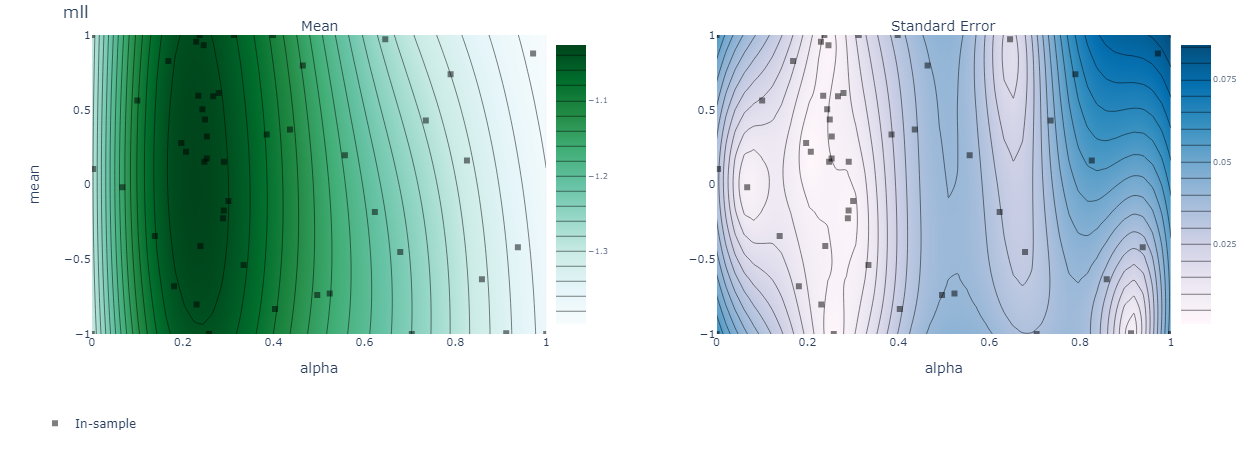

In [17]:
from ax.plot.contour import interact_contour, plot_contour_plotly, plot_contour

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
figure = plot_contour_plotly(model=model, param_x="alpha", param_y="mean", metric_name="mll")
figure

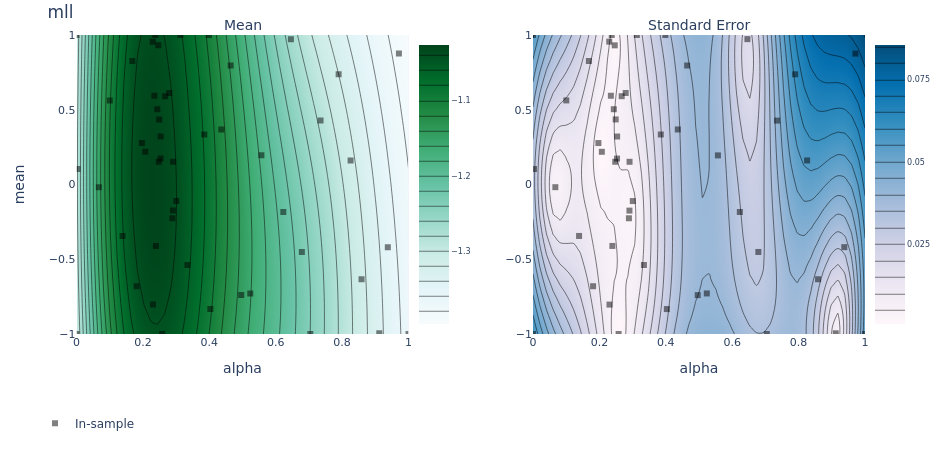

In [27]:
from IPython.display import Image
import plotly.io as pio
from ax.plot.contour import plot_contour_plotly, plot_contour

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
figure = plot_contour_plotly(model=model, param_x="alpha", param_y="mean", metric_name="mll")

img_bytes_pdf, img_bytes_png = pio.to_image(figure, format='pdf'), pio.to_image(figure, format='png')

# Save the figures
fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/model_bo')
fig_filename = os.path.join(fig_parent_path, 'alpha_mean_bo_contour_plot.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

# Write the PDF bytes directly to the file
with open(fig_filename, 'wb') as f:
    f.write(img_bytes_pdf)

# Display the static image
Image(img_bytes_png)

###### __Alpha-Noise Level contour plot__

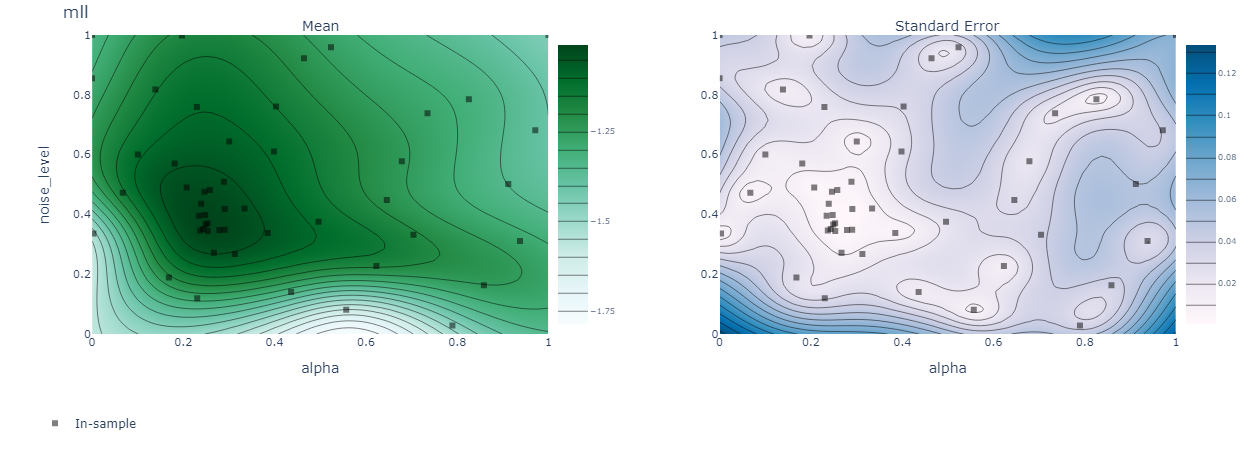

In [16]:
from ax.plot.contour import interact_contour, plot_contour_plotly, plot_contour

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
figure = plot_contour_plotly(model=model, param_x="alpha", param_y="noise_level", metric_name="mll")
figure

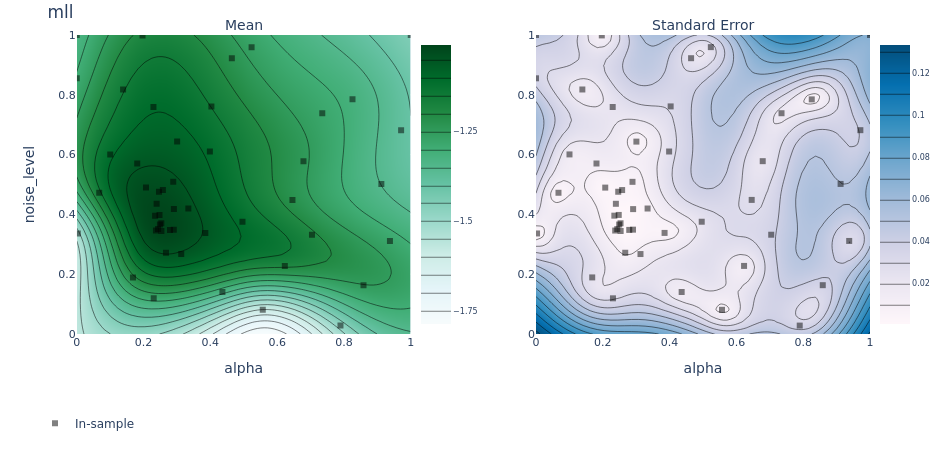

In [28]:
from IPython.display import Image
import plotly.io as pio
from ax.plot.contour import plot_contour_plotly, plot_contour

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
figure = plot_contour_plotly(model=model, param_x="alpha", param_y="noise_level", metric_name="mll")

img_bytes_pdf, img_bytes_png = pio.to_image(figure, format='pdf'), pio.to_image(figure, format='png')

# Save the figures
fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/model_bo')
fig_filename = os.path.join(fig_parent_path, 'alpha_noise_level_bo_contour_plot.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

# Write the PDF bytes directly to the file
with open(fig_filename, 'wb') as f:
    f.write(img_bytes_pdf)

# Display the static image
Image(img_bytes_png)

##### Additional details plots

###### __Optimization curve__

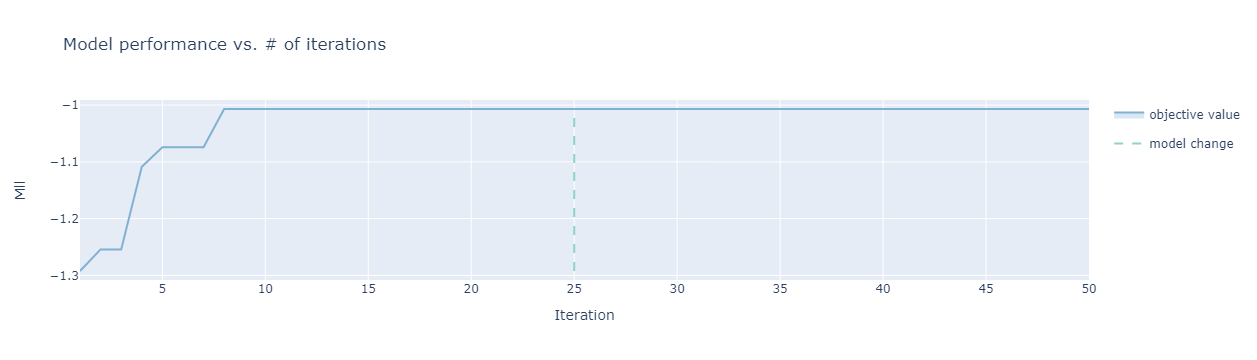

In [38]:
render(iqp_summary.bo_gp_model.ax_client.get_optimization_trace())

###### __Tile plots__

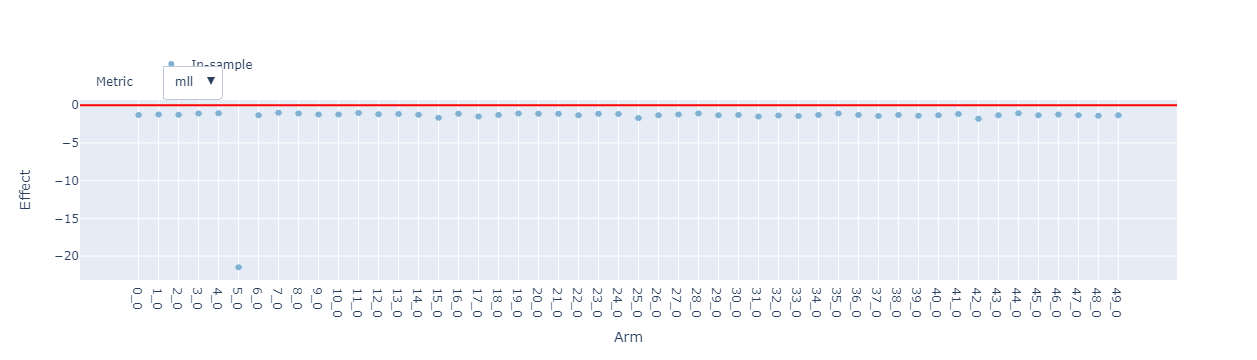

In [103]:
from ax.plot.scatter import interact_fitted

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
render(interact_fitted(model, rel=False))

###### __Slice plots__

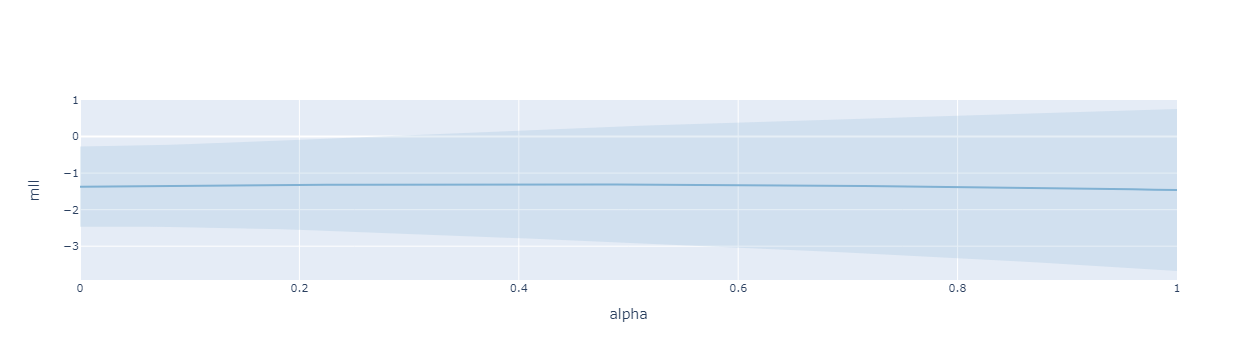

In [86]:
from ax.plot.slice import plot_slice

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
render(plot_slice(model, "alpha", "mll"))

###### __Cross-validation plots__

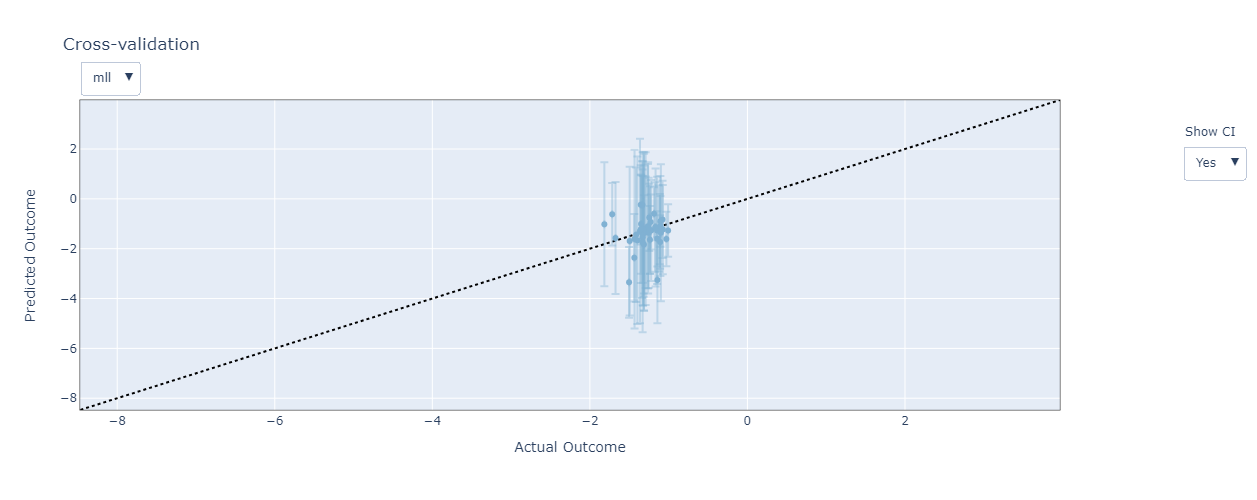

In [105]:
from ax.modelbridge.cross_validation import cross_validate
from ax.plot.diagnostic import interact_cross_validation

model = iqp_summary.bo_gp_model.ax_client.generation_strategy.model
cv_results = cross_validate(model)
render(interact_cross_validation(cv_results))

### Fidelity State Overlap plots

#### UMAP reduced fidelity state overlap

fidelities.max() = 0.9851961624850937, fidelities.min() = 0.6865584479122754 



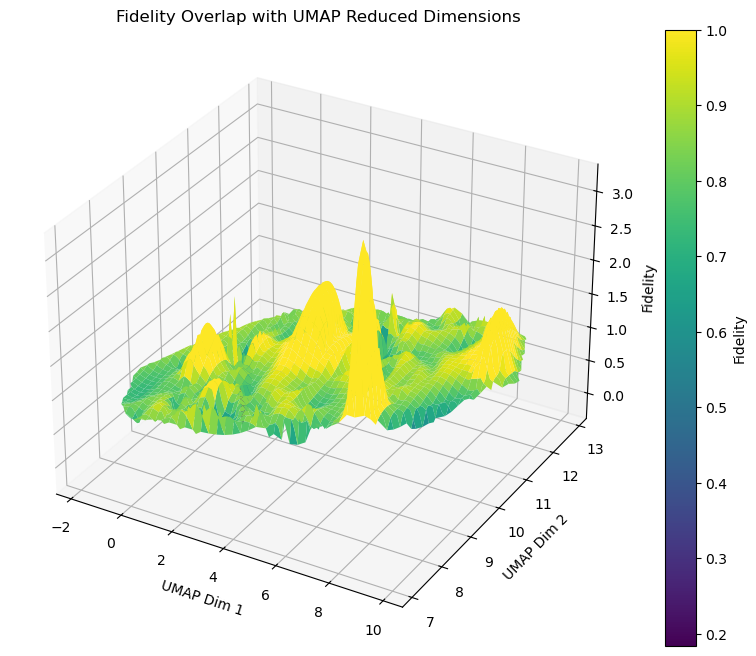

In [39]:
from src.data.data_utils import pre_process_standardize_time_series
if iqp_summary.cfg.model.standardize:
    standardized_series, _, _ = pre_process_standardize_time_series(iqp_summary.series)
else:
    standardized_series = iqp_summary.series

# Set the ref point to the mean value of the series
reference_point = torch.full((iqp_summary.train_x.shape[-1],), standardized_series.mean())

num_sample_points = 300
random_seed = 100997
figsize = (10, 8)
n_neighbors = 10

fig, fidelities = iqp_summary.get_reduced_fidelity_plot_umap(reference_point=reference_point, num_sample_points=num_sample_points, n_neighbors=n_neighbors, random_seed=random_seed, figsize=figsize)
print(f"fidelities.max() = {fidelities.max()}, fidelities.min() = {fidelities.min()} \n")

#### PCA reduced fidelity state overlap

fidelities.max() = 0.9887368252451676, fidelities.min() = 0.6723422755238234 



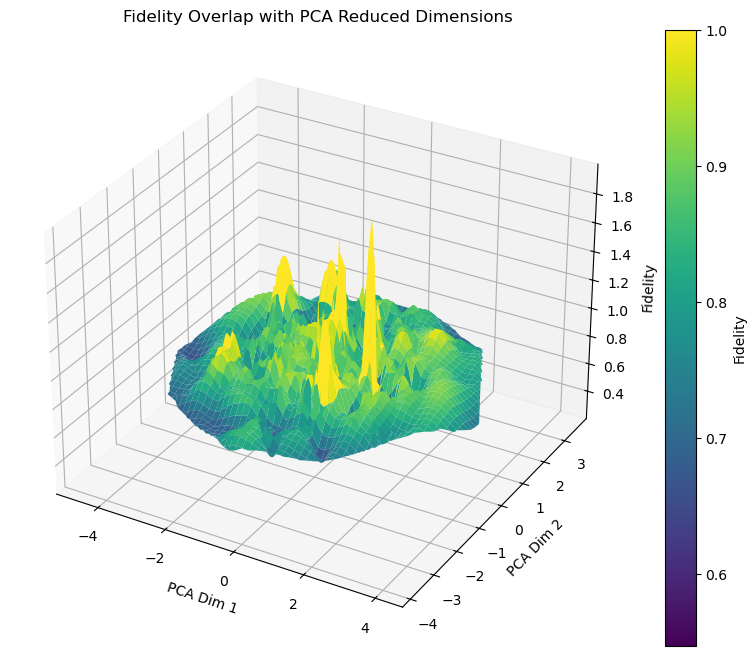

In [40]:
from src.data.data_utils import pre_process_standardize_time_series
if iqp_summary.cfg.model.standardize:
    standardized_series, _, _ = pre_process_standardize_time_series(iqp_summary.series)
else:
    standardized_series = iqp_summary.series

# Set the ref point to the mean value of the series
reference_point = torch.full((iqp_summary.train_x.shape[-1],), standardized_series.mean())

num_sample_points = 400
random_seed = 2000
figsize = (10, 8)

fig, fidelities = iqp_summary.get_reduced_fidelity_plot_pca(reference_point=reference_point, num_sample_points=num_sample_points, random_seed=random_seed, figsize=figsize)
print(f"fidelities.max() = {fidelities.max()}, fidelities.min() = {fidelities.min()} \n")

#### PCA inverse transformed fidelity plot

fidelities.max() = 0.999986851594379, fidelities.min() = 0.6736717075156384
reference_point_reduced = [[-0.03926294  0.0001728 ]] 



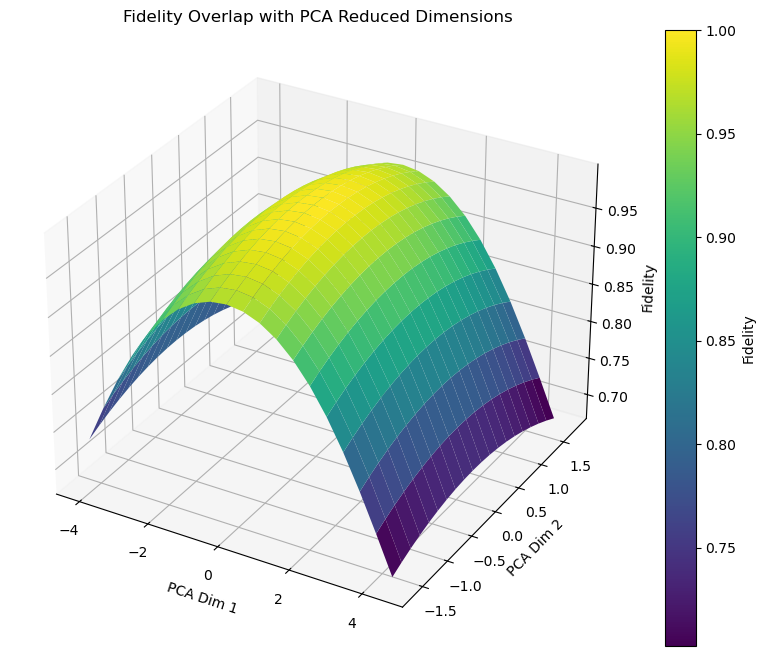

In [56]:
from src.data.data_utils import pre_process_standardize_time_series
if iqp_summary.cfg.model.standardize:
    standardized_series, _, _ = pre_process_standardize_time_series(iqp_summary.series)
else:
    standardized_series = iqp_summary.series

# Set the ref point to the mean value of the series
reference_point = torch.full((iqp_summary.train_x.shape[-1],), standardized_series.mean())

num_sample_points = 20
random_seed = 100997
figsize = (10, 8)

fig, fidelities, reference_point_reduced = iqp_summary.get_inv_pca_transformed_fidelity_plot(reference_point=reference_point, num_sample_points=num_sample_points, random_seed=random_seed, figsize=figsize)
print(f"fidelities.max() = {fidelities.max()}, fidelities.min() = {fidelities.min()}")
print(f"reference_point_reduced = {reference_point_reduced} \n")

**Explanations of the form of the figure above**: <br>
1- PCA Dim 1 captures more variance: In PCA, the first principal component is chosen to capture the maximum variance in the data. If changes in PCA Dim 1 lead to more significant changes in fidelity, this indicates that PCA Dim 1 is likely aligned with the most important features or variations in the data that affect fidelity.<br>
2- Inherent data structure: The underlying structure of your data might be such that the features which affect the quantum state overlap (and thus the fidelity) are more correlated with the variations along PCA Dim 1. This could be due to the physical or structural properties of the data you're studying.<br>
3- PCA Dim 2 is less informative: The relative insensitivity along PCA Dim 2 could mean that the variations captured by this dimension are not as critical to the fidelity measure or that the features correlated with PCA Dim 2 have a limited range of influence on the fidelity.

#### Fidelity state overlap varying the first 2 dimensions

(tensor(-9.2135e-18), -2.718417230583516, tensor(2.4297))

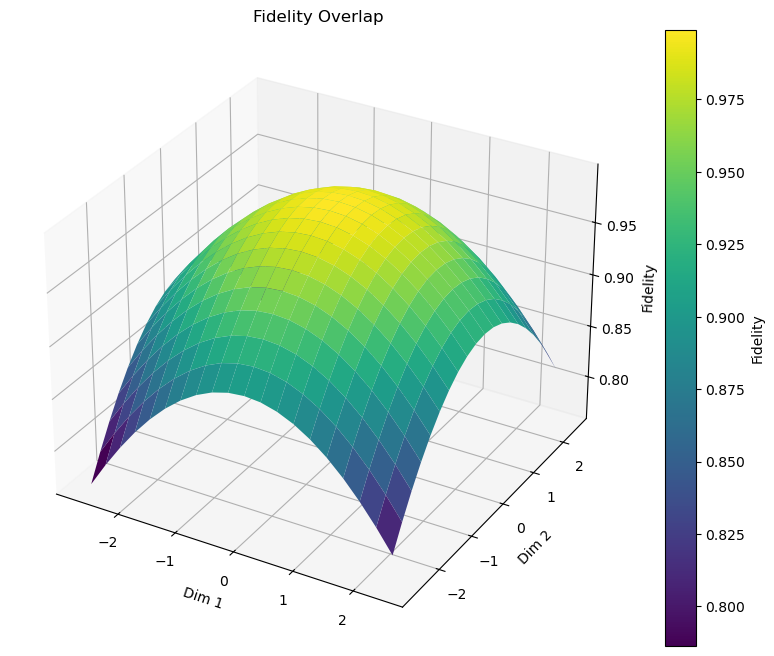

In [9]:
from src.data.data_utils import pre_process_standardize_time_series


if iqp_summary.cfg.model.standardize:
    standardized_time_series, _, _ = pre_process_standardize_time_series(iqp_summary.series)
else:
    standardized_time_series = iqp_summary.series

reference_point = torch.full((iqp_summary.train_x.shape[-1],), standardized_time_series.mean())  # Set the ref point to the mean value of the series
num_sample_points = 20
lower_bound = float(standardized_time_series.min())  # Set the min bound to the min value of the series
upper_bound = standardized_time_series.max()  # Set the max bound to the min value of the series

figsize = (10, 8)
fig, fidelities = iqp_summary.get_fidelity_state_overlap_plot(reference_point=reference_point, num_sample_points=num_sample_points, lower_bound=lower_bound, 
                                                          upper_bound=upper_bound, figsize=figsize)

# Save the figures
fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures')
fig_filename = os.path.join(fig_parent_path, 'state_overlap.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

standardized_time_series.mean(), lower_bound, upper_bound

##### Fidelity between extreem values

In [66]:
from src.data.data_utils import pre_process_standardize_time_series


if iqp_summary.cfg.model.standardize:
    standardized_time_series, _, _ = pre_process_standardize_time_series(iqp_summary.series)
else:
    standardized_time_series = iqp_summary.series

reference_point = torch.full((iqp_summary.train_x.shape[-1],), standardized_time_series.mean())  # Set the ref point to the mean value of the series
num_sample_points = 10
lower_bound = float(standardized_time_series.min())  # Set the min bound to the min value of the series
upper_bound = standardized_time_series.max()  # Set the max bound to the min value of the series

upper_extreem_point = torch.full((iqp_summary.train_x.shape[-1],), upper_bound)
lower_extreem_point = torch.full((iqp_summary.train_x.shape[-1],), lower_bound)

device = iqp_summary.bo_gp_model.gp_model.covar_module.device

upper_ref_fid = iqp_summary.bo_gp_model.gp_model.covar_module(upper_extreem_point.unsqueeze(0).to(device), reference_point.unsqueeze(0).to(device)).squeeze(-1).item()
lower_ref_fid = iqp_summary.bo_gp_model.gp_model.covar_module(lower_extreem_point.unsqueeze(0).to(device), reference_point.unsqueeze(0).to(device)).squeeze(-1).item()
upper_lower_fid = iqp_summary.bo_gp_model.gp_model.covar_module(lower_extreem_point.unsqueeze(0).to(device), upper_extreem_point.unsqueeze(0).to(device)).squeeze(-1).item()

print(f"Fidelity between the upper extreeme point and the mean point is {upper_ref_fid}")
print(f"Fidelity between the lower extreeme point and the mean point is {lower_ref_fid}")
print(f"Fidelity between the lower extreeme point and the upper extreeme point is {upper_lower_fid}")

Fidelity between the upper extreeme point and the mean point is 0.6117108784495741
Fidelity between the lower extreeme point and the mean point is 0.5489146325819895
Fidelity between the lower extreeme point and the upper extreeme point is 0.16813962216061093


### Varying the qubits

In [8]:
from src.visualization.summary import Summary
import os
from src.utils.settings import STORAGE_PATH
import matplotlib.pyplot as plt
import pandas as pd

path_multi_run = os.path.join(STORAGE_PATH, 'experiments', 'iqp_kernel', 'multirun', '2024-04-07', '13-33-09')
results_df = Summary.get_results_per_qubits(path_multi_run)
results_df

[INFO 04-11 11:10:06] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.
[INFO 04-11 11:10:07] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.
[INFO 04-11 11:10:07] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.
[INFO 04-11 11:10:08] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.
[WARNING 04-11 11:10:09] ax.modelbridge.cross_validation: Metric mll was unable to be reliably fit.
[WARNING 04-11 11:10:09] ax.service.utils.best_point: Model fit is poor; falling back on raw data for best point.
[WARNING 04-11 11:10:09] ax.service.utils.best_point: Model fit is poor and data on objective metric mll is noisy; interpret best points results carefully.
[INFO 04-11 11

qubits         LL       MAE
0       5 -47.517722  0.553852
1       6 -48.528426  0.574665
2       7 -46.469462  0.553556
3       8 -46.119790  0.529948
4       9 -49.123940  0.636925
5      10 -49.471483  0.619519

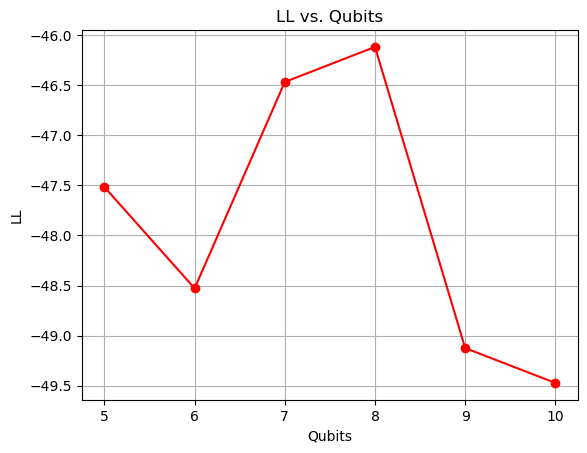

In [9]:
# Plot 2: LL vs. Qubits
fig_parent_path = os.path.join(STORAGE_PATH, 'figures', 'qubits_variation')
fig_filename = os.path.join(fig_parent_path, 'll-qubits.pdf')
if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)
    
plt.figure()
plt.plot(results_df['qubits'], results_df['LL'], 'o-', color='red')
plt.title('LL vs. Qubits')
plt.xlabel('Qubits')
plt.ylabel('LL')
plt.grid(True)
plt.savefig(fig_filename, format='pdf')

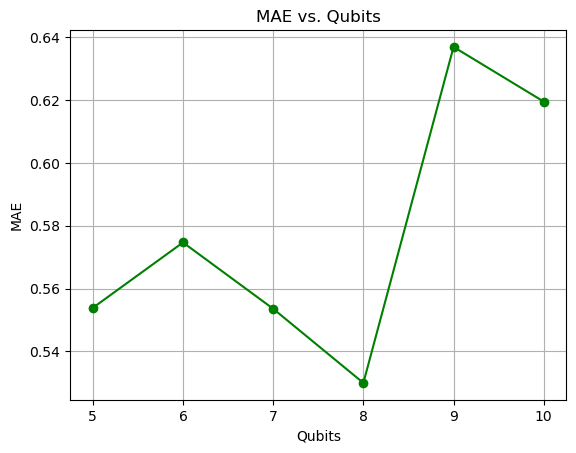

In [10]:
# Plot 3: MAE vs. Qubits
fig_parent_path = os.path.join(STORAGE_PATH, 'figures', 'qubits_variation')
fig_filename = os.path.join(fig_parent_path, 'mae-qubits.pdf')
if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)
    
plt.figure()
plt.plot(results_df['qubits'], results_df['MAE'], 'o-', color='green')
plt.title('MAE vs. Qubits')
plt.xlabel('Qubits')
plt.ylabel('MAE')
plt.grid(True)
plt.savefig(fig_filename)

## RBF Kernel

In [3]:
from src.visualization.summary import Summary
from src.utils.settings import PROJECT_ROOT_PATH, STORAGE_PATH
import os


path_to_rbf_exp = os.path.join(STORAGE_PATH, 'experiments', 'rbf_kernel', '2024-03-07', '19-48-35')
rbf_summary = Summary(path_to_rbf_exp)

[INFO 04-16 18:35:04] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


### Predicitons plot

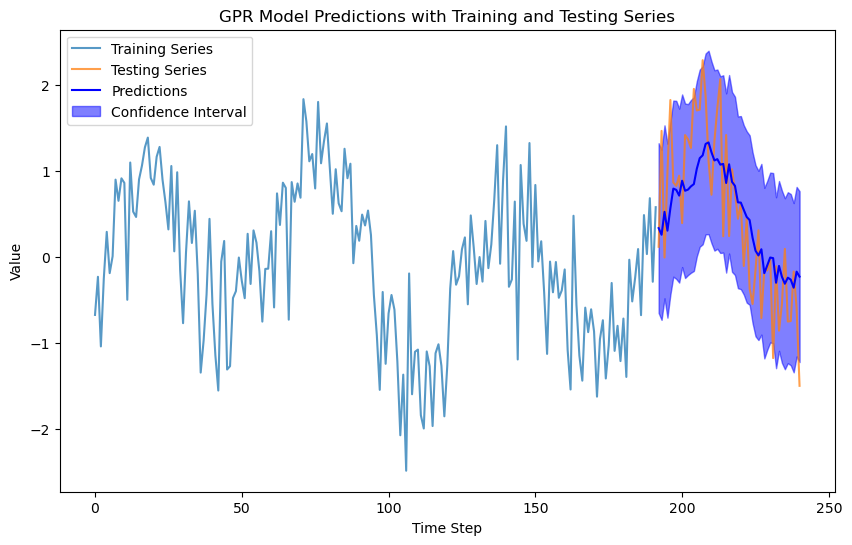

In [18]:
figsize = (10, 6)
fig = rbf_summary.generate_predictions_plot(figsize=figsize)

fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/test_predictions')
fig_filename = os.path.join(fig_parent_path, 'test_predictions_RBF.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

In [10]:
rbf_metrics_df = rbf_summary.compute_metrics()
rbf_metrics_df

model_name     SMAPE      WAPE      MAPE      RMSE       MAE       MSE  \
0  rbf_kernel  0.653616  0.598063  0.942324  0.672914  0.550024  0.452813   

   LogLikelihood     MCRPS  
0     -52.599395  0.391894

## Matern Kernel

In [4]:
from src.visualization.summary import Summary
from src.utils.settings import PROJECT_ROOT_PATH
import os


path_to_matern_exp = os.path.join(STORAGE_PATH, 'experiments', 'matern_kernel', '2024-03-07', '19-50-37')
matern_summary = Summary(path_to_matern_exp)

/home/local/USHERBROOKE/aara2601/anaconda3/envs/quack-tsf/lib/python3.12/site-packages/ax/core/parameter.py:518: UserWarning: `sort_values` is not specified for `ChoiceParameter` "nu". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
  warn(
[INFO 04-16 18:35:05] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


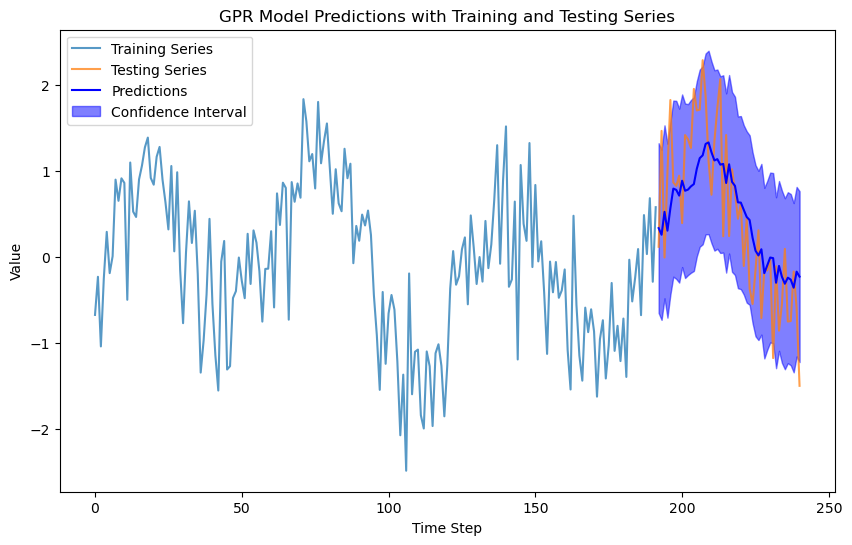

In [19]:
figsize = (10, 6)
fig = rbf_summary.generate_predictions_plot(figsize=figsize)

fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/test_predictions')
fig_filename = os.path.join(fig_parent_path, 'test_predictions_Matern.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

In [11]:
matern_metrics_df = matern_summary.compute_metrics()
matern_metrics_df

model_name     SMAPE      WAPE      MAPE      RMSE       MAE       MSE  \
0  matern_kernel  0.685362  0.621422  0.950523  0.696314  0.571506  0.484853   

   LogLikelihood     MCRPS  
0     -50.216731  0.401341

## RQK Kernel

In [5]:
from src.visualization.summary import Summary
from src.utils.settings import PROJECT_ROOT_PATH
import os


path_to_rqk_exp = os.path.join(STORAGE_PATH, 'experiments', 'rqk_kernel', '2024-03-07', '19-50-06')
rqk_summary = Summary(path_to_rqk_exp)

[INFO 04-16 18:35:06] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.
[WARNING 04-16 18:35:06] ax.modelbridge.cross_validation: Metric mll was unable to be reliably fit.
[WARNING 04-16 18:35:06] ax.service.utils.best_point: Model fit is poor; falling back on raw data for best point.
[WARNING 04-16 18:35:06] ax.service.utils.best_point: Model fit is poor and data on objective metric mll is noisy; interpret best points results carefully.


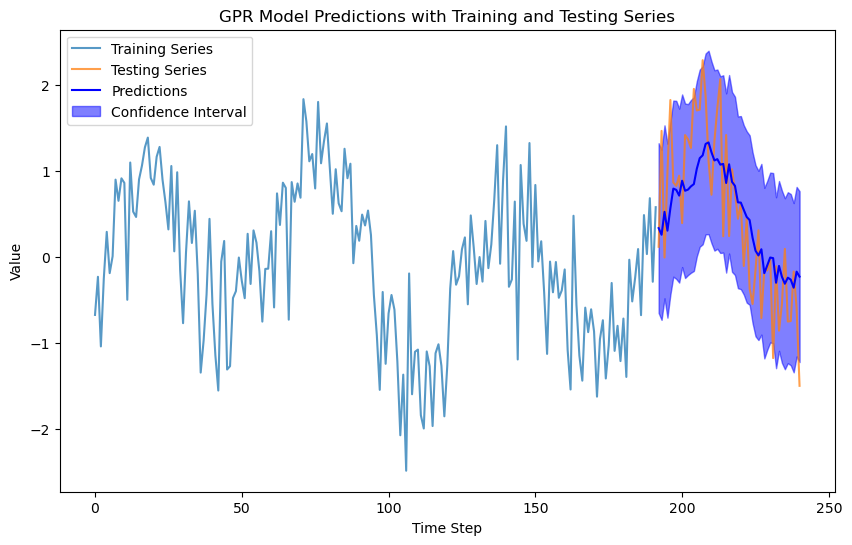

In [20]:
figsize = (10, 6)
fig = rbf_summary.generate_predictions_plot(figsize=figsize)

fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/test_predictions')
fig_filename = os.path.join(fig_parent_path, 'test_predictions_RQ.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

In [12]:
rqk_metrics_df = rqk_summary.compute_metrics()
rqk_metrics_df

model_name     SMAPE      WAPE      MAPE      RMSE       MAE       MSE  \
0  rqk_kernel  0.695145  0.623391  0.903838  0.703741  0.573317  0.495251   

   LogLikelihood     MCRPS  
0     -50.442423  0.403775

## Periodic Kernel

In [6]:
from src.visualization.summary import Summary
from src.utils.settings import PROJECT_ROOT_PATH
import os


path_to_periodic_exp = os.path.join(STORAGE_PATH, 'experiments', 'periodic_kernel', '2024-03-07', '19-50-16')
periodic_summary = Summary(path_to_periodic_exp)

[INFO 04-16 18:35:09] ax.modelbridge.torch: The observations are identical to the last set of observations used to fit the model. Skipping model fitting.


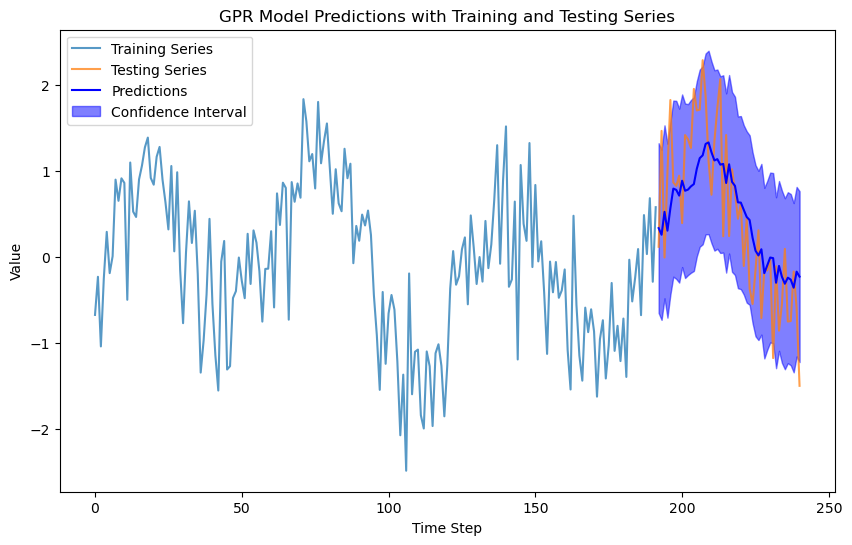

In [22]:
figsize = (10, 6)
fig = rbf_summary.generate_predictions_plot(figsize=figsize)

fig_parent_path = os.path.join(PROJECT_ROOT_PATH, 'storage/figures/test_predictions')
fig_filename = os.path.join(fig_parent_path, 'test_predictions_PER.pdf')

if not os.path.exists(fig_parent_path):
     os.mkdir(fig_parent_path)

plt.savefig(fig_filename, format='pdf')

In [13]:
periodic_metrics_df = periodic_summary.compute_metrics()
periodic_metrics_df

model_name     SMAPE      WAPE      MAPE      RMSE       MAE  \
0  periodic_kernel  0.688907  0.618723  0.906199  0.698173  0.569024   

        MSE  LogLikelihood     MCRPS  
0  0.487445     -50.392473  0.400667

## Test metrics put together

In [14]:
import pandas as pd

dataframes = [iqp_metrics_df, rbf_metrics_df, matern_metrics_df, rqk_metrics_df, periodic_metrics_df]

# Concatenate them vertically
result = pd.concat(dataframes, axis=0)

# Reset index if you want a clean, sequential index
model_metrics = result.reset_index(drop=True)

model_metrics

model_name     SMAPE      WAPE      MAPE      RMSE       MAE  \
0       iqp_kernel  0.675850  0.617786  0.946308  0.692123  0.568163   
1       rbf_kernel  0.653616  0.598063  0.942324  0.672914  0.550024   
2    matern_kernel  0.685362  0.621422  0.950523  0.696314  0.571506   
3       rqk_kernel  0.695145  0.623391  0.903838  0.703741  0.573317   
4  periodic_kernel  0.688907  0.618723  0.906199  0.698173  0.569024   

        MSE  LogLikelihood     MCRPS  
0  0.479034     -50.575544  0.399198  
1  0.452813     -52.599395  0.391894  
2  0.484853     -50.216731  0.401341  
3  0.495251     -50.442423  0.403775  
4  0.487445     -50.392473  0.400667

## Hellinger distances

This provides the piece-wise Hellinger distance between the multivariate posterior test distributions predicted by each model

In [13]:
import pandas as pd

summary_list = [iqp_summary, rbf_summary, matern_summary, rqk_summary, periodic_summary]
hellinger_distances = Summary.get_hellinger_distances(summary_list)
hellinger_distances

iqp_kernel rbf_kernel matern_kernel rqk_kernel periodic_kernel
iqp_kernel               0   0.607927      0.211372   0.376056        0.398322
rbf_kernel        0.607927          0      0.609375   0.709975        0.713792
matern_kernel     0.211372   0.609375             0   0.244479        0.281279
rqk_kernel        0.376056   0.709975      0.244479          0        0.074021
periodic_kernel   0.398322   0.713792      0.281279   0.074021               0